<a href="https://colab.research.google.com/github/aravindhv7/First-One/blob/master/MNIST_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><h2><b><font color = 'Blue'> MNIST Case Study </font></b></h2></p>

The MNIST problem is a dataset developed by Yann LeCun, Corinna Cortes and Christopher Burges for evaluating machine learning models on the handwritten digit classification problem.

The dataset was constructed from a number of scanned document dataset available from the National Institute of Standards and Technology (NIST). This is where the name for the dataset comes from, as the Modified NIST or MNIST dataset.

Images of digits were taken from a variety of scanned documents, normalized in size and centered. This makes it an excellent dataset for evaluating models, allowing the developer to focus on the machine learning with very little data cleaning or preparation required.

Each image is a 28 by 28 pixel square (784 pixels total). A standard split of the dataset is used to evaluate and compare models, where 60,000 images are used to train a model and a separate set of 10,000 images are used to test it.

It is a digit recognition task. As such there are 10 digits (0 to 9) or 10 classes to predict. Results are reported using prediction error, which is nothing more than the inverted classification accuracy.

<img src = 'https://dim-mlp-images.s3.amazonaws.com/Deep+Learning/MINST/MNIST.png'>

In [0]:
 !pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 46kB/s 
     |████████████████████████████████| 3.8MB 46.2MB/s 
     |████████████████████████████████| 450kB 56.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=261c3f629dc1e3055bf599ed771b9d9dfa74e1c140a25083176f72394291b0d7
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc4 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc4 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.2.0rc4 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling

In [0]:
%tensorflow_version 2.x
from tensorflow import keras

In [0]:
import tensorflow as tf

In [0]:
keras.__version__

'2.3.0-tf'

In [0]:
keras.__version__

'2.3.0-tf'

<p><h3><b><font color = 'DarkBlue'> Loading the MNIST dataset in Keras </font></b></h3></p>

The MNIST dataset comes preloaded in Keras, in the form of a set of four Numpy
arrays.

In [0]:
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
keras.datasets         #gives all the datasets 

<module 'tensorflow.keras.datasets' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/__init__.py'>

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()        #x_train , y_train , x_test , y_test 

11493376/11490434 [==============================] - 1s 0us/step


<p><b>train_images and train_labels form the training set, the data that the model will learn from. The model will then be tested on the test set, test_images and test_labels.</b></p>

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

<p><h3><font color= 'DarkBlue'><b> Visualizing first four samples in Train dataset </b></font></h3></p>





In [0]:
import matplotlib.pyplot as plt         #to see the data in the dataset 

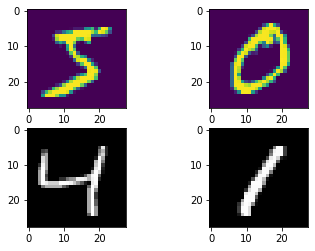

In [0]:
plt.subplot(2,2,1)                                        # 2*2 is the number of r and c 
plt.imshow(train_images[0])                           
plt.subplot(2,2,2)
plt.imshow(train_images[1])
plt.subplot(2,2,3)
plt.imshow(train_images[2], cmap=plt.get_cmap('gray'))    #in gray scale  r g b is 0 
plt.subplot(2,2,4)
plt.imshow(train_images[3], cmap=plt.get_cmap('gray'))

<p><h3><b><font color = 'DarkBlue'> Preparing the image data </font></b></h3></p>

The training dataset is structured as a 3-dimensional array of instance, image width and image height. For a multi-layer perceptron model we must reduce the images down into a vector of pixels. In this case the 28×28 sized images will be 784 pixel input values.

Before training, we’ll preprocess the data by reshaping it into the shape the network expects and scaling it so that all values are in the [0, 1] interval. Previously, our training
images, for instance, were stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval. We transform it into a float32 array of
shape (60000, 28 * 28) with values between 0 and 1.


In [0]:
train_images.ndim

3

In [0]:
train_images[10:20,10:20,10:20]                          #RGB 

array([[[  0,   0,   0,  24, 209, 254, 254, 254, 171,   0],
        [  0,   0,  91, 137, 253, 254, 254, 254, 112,   0],
        [ 40, 214, 250, 254, 254, 254, 254, 254,  34,   0],
        [ 81, 247, 254, 254, 254, 254, 254, 254, 146,   0],
        [  0, 110, 246, 254, 254, 254, 254, 254, 171,   0],
        [  0,   0,  73,  89,  89,  93, 240, 254, 171,   0],
        [  0,   0,   0,   0,   0,   1, 128, 254, 219,  31],
        [  0,   0,   0,   0,   0,   7, 254, 254, 214,  28],
        [  0,   0,   0,   0,   0, 138, 254, 254, 116,   0],
        [  0,   0,   0,   0,  25, 240, 254, 254,  34,   0]],

       [[  0,   0,   0,   0,  19, 154, 254, 236, 203,  83],
        [  0,   0,   0,   0, 144, 253, 145,  12,   0,   0],
        [  0,  10, 129, 222,  78,  79,   8,   0,   0,   0],
        [  0, 134, 253, 167,   8,   0,   0,   0,   0,   0],
        [  0, 255, 254,  78,   0,   0,   0,   0,   0,   0],
        [  0, 201, 253, 226,  69,   0,   0,   0,   0,   0],
        [  0,  18, 128, 253, 241,  41,

In [0]:
train_images = train_images.reshape((60000, 28 * 28))            #reshaipng the data to 2D 
train_images = train_images.astype('float32') / 255              #normalisng the data ,so that values stay between[0,1]
test_images = test_images.reshape((10000, 28 * 28)) 
test_images = test_images.astype('float32') / 255

In [0]:
train_images.ndim

2

In [0]:
train_images.shape

(60000, 784)

In [0]:
train_images[15090:15100,390:400]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.48235294, 0.99607843],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

<p><h3><b><font color = 'DarkBlue'> Preparing the labels </font></b></h3></p>

the output variable is an integer from 0 to 9. This is a multi-class classification problem. As such, it is good practice to use a one hot encoding of the class values, transforming the vector of class integers into a binary matrix. We use to_categorical() to encode the labels.

In [0]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)             #for3 - 0 0 0 1 0 0 0 0 0 0 0

In [0]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [0]:
from keras import models
from keras import layers

# ***2. Building a model using Functional API ***



In [0]:
from keras.layers import Input
from keras.layers import Dense
from keras.models import Model

1. we are creating a model with a input layer that accepts the input of 784. 

2. Next, we added a dense layer with 30 neurons with 'relu' activation function and connect it to input layer. 

3. similarly, another dense layer with 20 neurons with 'relu' activation function is added which is connected to the first hidden layer (hidden1).

4. lastly, we have added an output dense layer with 10 neurons and a 'softmax' activation function. The input to this layer is the output of second hidden layer (hidden2). 

5. Finally, we have created a model with the above created layers required for computation. 


In [0]:
inp = keras.layers.Input(shape=(784,))
hidden1 = keras.layers.Dense(30, activation='relu')(inp)              #input calling this layer as function
hidden2 = keras.layers.Dense(20, activation='relu')(hidden1)          #hidden1 is input  
out = keras.layers.Dense(10, activation='softmax')(hidden2)
model_fapi = keras.models.Model(inputs=inp, outputs=out)

In [0]:
model_fapi.summary()    

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_fapi.compile(optimizer='sgd',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [0]:
model_fapi.fit(train_images, train_labels, epochs=10, batch_size=512)

Epoch 1/10
118/118 [==============================] - 0s 3ms/step - loss: 2.1573 - accuracy: 0.2529
Epoch 2/10
118/118 [==============================] - 0s 3ms/step - loss: 1.7395 - accuracy: 0.5062
Epoch 3/10
118/118 [==============================] - 0s 3ms/step - loss: 1.2752 - accuracy: 0.6736
Epoch 4/10
118/118 [==============================] - 0s 3ms/step - loss: 0.9378 - accuracy: 0.7700
Epoch 5/10
118/118 [==============================] - 0s 3ms/step - loss: 0.7530 - accuracy: 0.8062
Epoch 6/10
118/118 [==============================] - 0s 3ms/step - loss: 0.6461 - accuracy: 0.8285
Epoch 7/10
118/118 [==============================] - 0s 3ms/step - loss: 0.5772 - accuracy: 0.8440
Epoch 8/10
118/118 [==============================] - 0s 3ms/step - loss: 0.5292 - accuracy: 0.8550
Epoch 9/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4938 - accuracy: 0.8630
Epoch 10/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4665 - accuracy: 0.8699

In [0]:
y_pred_fapi = model_fapi.predict(test_images)    # predict() estimates one probablity per class from 0 to 9 
y_pred_fapi

array([[3.2219528e-03, 3.7815579e-07, 4.0845503e-04, ..., 9.7982955e-01,
        4.1282724e-04, 1.1643850e-02],
       [4.8734933e-02, 5.1405048e-03, 4.2983249e-01, ..., 1.9180122e-06,
        9.9637648e-03, 5.0688916e-05],
       [1.8134356e-03, 9.3997568e-01, 1.1021340e-02, ..., 4.2710640e-03,
        1.5679270e-02, 1.4072565e-03],
       ...,
       [1.7990847e-04, 3.0401247e-04, 1.3151982e-04, ..., 2.7087734e-03,
        3.6551695e-02, 2.1489002e-01],
       [3.7317013e-03, 2.1813631e-02, 8.2326951e-03, ..., 2.5525540e-03,
        2.1676704e-01, 1.5046463e-02],
       [2.4966048e-03, 2.1839419e-08, 7.1682676e-04, ..., 6.8697066e-09,
        9.3068201e-07, 8.4650837e-06]], dtype=float32)

In [0]:
import numpy as np

In [0]:
#np.where((y_pred_fapi == max(y_pred_fapi[:,:])),1,0)
y_pred_class = []
len(y_pred_fapi)
for i in np.arange(len(y_pred_fapi)):
  for j in np.arange(0,10):
    if(y_pred_fapi[i,j] == max(y_pred_fapi[i,:])):
      y_pred_class.append(j)

y_pred_class = np.array(y_pred_class)
y_pred_class

array([7, 6, 1, ..., 4, 5, 6])

In [0]:
test_loss_fapi, test_acc_fapi = model_fapi.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
print(test_loss_fapi)
print(test_acc_fapi)

0.4403073364019394
0.8779


<p><h3><b><font color='DarkBlue'> Building Complex Model using Functional API </font></b></h3></p>

We can build a complex model using functional API by following steps: 

1. We are creating a model with a input layer that accepts the input of 784. 

2. Next, we added a dense layer with 30 neurons with 'relu' activation function and connect it to input layer. 

3. similarly, another dense layer with 30 neurons with 'relu' activation function is added which is connected to the first hidden layer (hidden1).

4. Next, we create a Concatenate() layer, and once again we immediately use it like a function, to concatenate the input and the output of the second hidden layer. 

5. Lastly, we have added an output dense layer with 10 neurons and a 'softmax' activation function. The input to this layer is the result of the concatenation layer. 

6. Finally, we create a model with the above created layers required for computation. 

Once you have built the Keras model, everything is exactly like earlier, i.e: compile the model, train it, evaluate it and use it to make predictions.

<img src = "https://dim-mlp-images.s3.amazonaws.com/Deep+Learning/MINST/wide+and+deep+network.png" width =600 height =600> 


In [0]:
inp1 = keras.layers.Input(shape=(784))
hidden1 = keras.layers.Dense(30, activation="relu")(inp1)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([inp1, hidden2])
out = keras.layers.Dense(10, activation="softmax" )(concat)
model_wide_deep = keras.models.Model(inputs=[inp1], outputs=[out])

In [0]:
model_wide_deep.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           23550       input_2[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 30)           930         dense_3[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 814)          0           input_2[0][0]                    
                                                                 dense_4[0][0]              

In [0]:
model_wide_deep.compile(optimizer='sgd',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [0]:
model_wide_deep.fit(train_images, train_labels, epochs=10, batch_size=512)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 42us/sample - loss: 1.8410 - accuracy: 0.4881
Epoch 2/10
60000/60000 [==============================] - 0s 8us/sample - loss: 1.2632 - accuracy: 0.7572
Epoch 3/10
60000/60000 [==============================] - 0s 8us/sample - loss: 1.0008 - accuracy: 0.8038
Epoch 4/10
60000/60000 [==============================] - 0s 8us/sample - loss: 0.8572 - accuracy: 0.8231
Epoch 5/10
60000/60000 [==============================] - 0s 8us/sample - loss: 0.7669 - accuracy: 0.8351
Epoch 6/10
60000/60000 [==============================] - 0s 8us/sample - loss: 0.7041 - accuracy: 0.8432
Epoch 7/10
60000/60000 [==============================] - 0s 8us/sample - loss: 0.6577 - accuracy: 0.8505
Epoch 8/10
60000/60000 [==============================] - 0s 8us/sample - loss: 0.6217 - accuracy: 0.8558
Epoch 9/10
60000/60000 [==============================] - 0s 8us/sample - loss: 0.5927 - accuracy: 0.8602
Epoch 10/10
60000/6000

In [0]:
y_pred_wide = model_wide_deep.predict(test_images)

In [0]:
y_pred_wide

array([[6.1651967e-03, 4.2793903e-04, 2.9888139e-03, ..., 9.3804288e-01,
        3.2201188e-03, 3.2584026e-02],
       [3.9735347e-02, 1.1454854e-02, 6.3393968e-01, ..., 2.2150809e-04,
        3.0905401e-02, 5.7099800e-04],
       [4.7798925e-03, 8.5339373e-01, 2.6936410e-02, ..., 1.2665876e-02,
        2.9080540e-02, 9.6862679e-03],
       ...,
       [4.6882700e-04, 2.6325674e-03, 1.8267456e-03, ..., 4.7710538e-02,
        4.5793612e-02, 2.1662012e-01],
       [4.7888033e-02, 7.6326944e-02, 2.7443208e-02, ..., 4.7107194e-02,
        4.1914952e-01, 1.8906832e-02],
       [1.1367470e-02, 3.4818459e-05, 1.2314161e-02, ..., 6.2509484e-05,
        4.4011252e-04, 4.2037040e-04]], dtype=float32)

In [0]:
y_pred_class = y_pred_wide.argmax(axis=1)
y_pred_class

array([7, 2, 1, ..., 4, 8, 6])

In [0]:
test_loss, test_acc = model_wide_deep.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
test_loss

0.5381029640197754

In [0]:
test_acc

0.8713

<p><h3><b><font color = 'DarkBlue'> Complex Model with multiple inputs </font></b></h3></p>

We can also create a model by sending a subset of the features through the wide path, and a different subset (possibly overlapping) through the deep path. 

<img src = "https://dim-mlp-images.s3.amazonaws.com/Deep+Learning/MINST/wide+and+deep+network+multi+input.png" width=600 height=600>

Here we used first 500 columns as input_A and all the columns (784) as input_B. 

Rest of the model building procedure is same except now we specify inputs=[input_A, input_B] and outputs = [output] 

Now we can compile the model as usual, but when we call the fit() method, instead of passing a single input matrix (train_images), we must pass a
pair of matrices (X_train_A, X_train_B): one per input. The same is true for
X_test when you call evaluate() or predict(). 

In [0]:
input_A = keras.layers.Input(shape=(500,))
input_B = keras.layers.Input(shape=(784,))
hidden1 = keras.layers.Dense(100, activation="relu")(input_B)
hidden2 = keras.layers.Dense(100, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(10, activation='softmax')(concat)
model_wide_deep1 = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [0]:
model_wide_deep1.compile(optimizer='sgd',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [0]:
X_train_A, X_train_B = train_images[:,:500], train_images[:,:]
X_train_A.shape, X_train_B.shape

((60000, 500), (60000, 784))

In [0]:
X_test_A, X_test_B = test_images[:,:500], test_images[:,:]
X_test_A.shape, X_test_B.shape

((10000, 500), (10000, 784))

In [0]:
model_wide_deep1.fit((X_train_A, X_train_B), train_labels, epochs=10, batch_size=512)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 19us/sample - loss: 1.9099 - accuracy: 0.4273
Epoch 2/10
60000/60000 [==============================] - 1s 11us/sample - loss: 1.3936 - accuracy: 0.6851
Epoch 3/10
60000/60000 [==============================] - 1s 12us/sample - loss: 1.1120 - accuracy: 0.7613
Epoch 4/10
60000/60000 [==============================] - 1s 11us/sample - loss: 0.9347 - accuracy: 0.7946
Epoch 5/10
60000/60000 [==============================] - 1s 11us/sample - loss: 0.8125 - accuracy: 0.8163
Epoch 6/10
60000/60000 [==============================] - 1s 11us/sample - loss: 0.7234 - accuracy: 0.8307
Epoch 7/10
60000/60000 [==============================] - 1s 11us/sample - loss: 0.6560 - accuracy: 0.8421
Epoch 8/10
60000/60000 [==============================] - 1s 11us/sample - loss: 0.6037 - accuracy: 0.8513
Epoch 9/10
60000/60000 [==============================] - 1s 12us/sample - loss: 0.5625 - accuracy: 0.8587
Epoch 10/10
60

In [0]:
y_pred_wide1 = model_wide_deep1.predict((X_test_A, X_test_B))
y_pred_class1 = y_pred_wide1.argmax(axis=1)
y_pred_class1

array([7, 2, 1, ..., 4, 8, 6])

In [0]:
test_loss, test_acc = model_wide_deep1.evaluate((X_test_A, X_test_B), test_labels)
test_loss, test_acc

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

(0.49121932332515716, 0.8774)

<p><h3><b><font color = 'DarkBlue'> Complex Model with multiple outputs </font></b></h3></p>

There are also many use cases in which you may want to have multiple outputs:

• The task may demand it, for example you may want to locate and classify the
main object in a picture. This is both a regression task (finding the coordinates of the object’s center, as well as its width and height) and a classification task.

• Similarly, you may have multiple independent tasks to perform based on the
same data. Sure, you could train one neural network per task, but in many cases
you will get better results on all tasks by training a single neural network with one output per task. This is because the neural network can learn features in the data that are useful across tasks.

• Another use case is as a regularization technique (i.e., a training constraint whose objective is to reduce overfitting and thus improve the model’s ability to generalize). For example, you may want to add some auxiliary outputs in a neural network architecture (see following figure ) to ensure that the underlying part of the network learns something useful on its own, without relying on the rest of the network.

<img src = "https://dim-mlp-images.s3.amazonaws.com/Deep+Learning/MINST/wide+and+deep+network+multi+output.png" width=600 height=600>

Adding extra outputs is quite easy: just connect them to the appropriate layers and add them to your model’s list of outputs.

In [0]:
# Building the model

input_A = keras.layers.Input(shape=(500,))
input_B = keras.layers.Input(shape=(784,))
hidden1 = keras.layers.Dense(100, activation="relu")(input_B)
hidden2 = keras.layers.Dense(100, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(10, activation='softmax')(concat)
aux_output = keras.layers.Dense(10, activation='softmax')(hidden2)
model_wide_deep2 = keras.models.Model(inputs=[input_A, input_B],
outputs=[output, aux_output])


In [0]:
model_wide_deep2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 100)          78500       input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 500)]        0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 100)          10100       dense[0][0]                      
______________________________________________________________________________________________

Each output will need its own loss function, so when we compile the model we
should pass a list of losses. However, we care much more about the main output than about the auxiliary output (as it is just used for regularization), so we want to give the main output’s loss a much greater weight. So in compile step we can set the loss weights.

In [0]:
model_wide_deep2.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

While training the model, we need to provide some labels for each output. In
this example, the main output and the auxiliary output should try to predict the same thing, so they should use the same labels.

In [0]:
model_wide_deep2.fit((X_train_A, X_train_B), (train_labels,train_labels) , epochs=20, batch_size=512) 


Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0907 - dense_2_loss: 0.0907 - dense_3_loss: 0.0905
Epoch 2/20
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0901 - dense_2_loss: 0.0901 - dense_3_loss: 0.0905
Epoch 3/20
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0896 - dense_2_loss: 0.0895 - dense_3_loss: 0.0904
Epoch 4/20
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0891 - dense_2_loss: 0.0889 - dense_3_loss: 0.0904
Epoch 5/20
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0886 - dense_2_loss: 0.0884 - dense_3_loss: 0.0904
Epoch 6/20
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0881 - dense_2_loss: 0.0878 - dense_3_loss: 0.0904
Epoch 7/20
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0875 - dense_2_loss: 0.0872 - dense_3_loss: 0.0903
Epoch 8/20
60000/60000 [===============

When we evaluate the model, Keras will return the total loss, as well as all the individual losses.

In [0]:
total_loss, main_loss, aux_loss = model_wide_deep2.evaluate((X_test_A, X_test_B), (test_labels,test_labels))
total_loss, main_loss, aux_loss

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

(0.07982472914457321, 0.078714915, 0.0898272)

The predict() method will return predictions for each output. 

In [0]:
y_pred_main, y_pred_aux= model_wide_deep2.predict((X_test_A, X_test_B))
y_pred_class2 = y_pred_main.argmax(axis=1)
y_pred_class2

array([7, 4, 1, ..., 9, 9, 6])